#  《利用Python进行数据分析》1st Edition chapter 8

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import os

## Figure 和 Subplot

matplotlib API docs: https://matplotlib.org/api/index.html

In [2]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [3]:
ax1 = fig.add_subplot(2, 2, 1)    #图像是 2 * 2的， 并且当前选中4个subplot中的第一个，编号从1开始

In [4]:
ax2 = fig.add_subplot(2, 2, 2)

In [5]:
ax3 = fig.add_subplot(2, 2, 3)

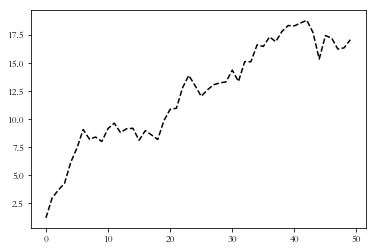

In [6]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [7]:
type(ax3)

matplotlib.axes._subplots.AxesSubplot

In [8]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [9]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

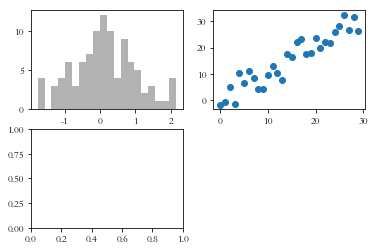

In [10]:
fig

In [11]:
ax3.plot(np.random.randn(50).cumsum(), 'k--')

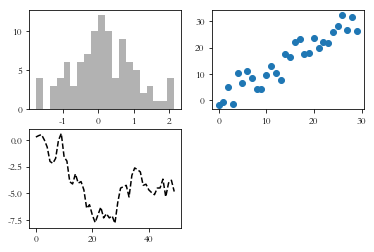

In [12]:
fig

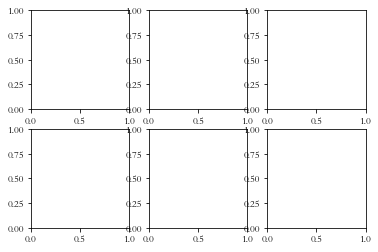

In [13]:
fig, axes = plt.subplots(2, 3)

In [14]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CAEB0F0>,
      dtype=object)

In [15]:
# 利用 subplots_adjust() 调整subplot之间的间距, 此外该函数还是个顶级函数
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)   # wspace和hspace用于控制宽度和高度的百分比

<Figure size 432x288 with 0 Axes>

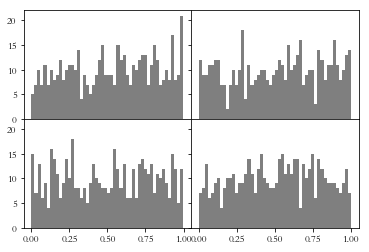

In [16]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.rand(500), bins=50, color='k', alpha=0.5)
        
plt.subplots_adjust(wspace=0, hspace=0)

In [17]:
"""
    u'参数说明'： axes.hist()    -- create a histogram  (直方图)
                bins : int or sequence or str
                color : color or array_like of colors or None, optional
                orientation : {'horizontal', 'vertical'}, optiona
                histtype : {'bar', 'barstacked', 'step', 'stepfilled'}, optional
""" 

"\n    u'\xe5\x8f\x82\xe6\x95\xb0\xe8\xaf\xb4\xe6\x98\x8e'\xef\xbc\x9a axes.hist()    -- create a histogram  (\xe7\x9b\xb4\xe6\x96\xb9\xe5\x9b\xbe)\n                bins : int or sequence or str\n                color : color or array_like of colors or None, optional\n                orientation : {'horizontal', 'vertical'}, optiona\n                histtype : {'bar', 'barstacked', 'step', 'stepfilled'}, optional\n"

In [18]:
from numpy.random import randn

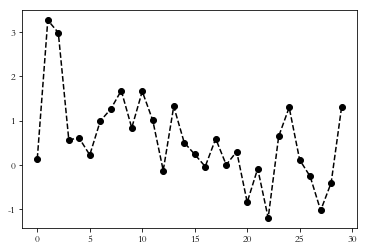

In [19]:
plt.figure()
#fmt 参数的说明详见 https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot 中的Notes section
plt.plot(randn(30).cumsum(), 'ko--')    

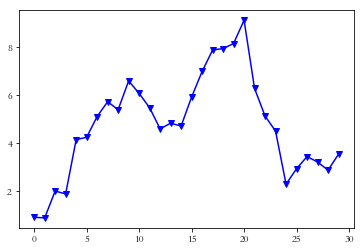

In [20]:
plt.plot(randn(30).cumsum(), 'bv-')     #fmt格式举例： b : blue, v : triangle down  - : solid line

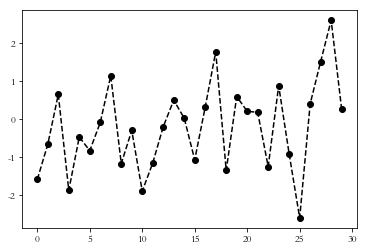

In [21]:
#或者可以将格式更加明确地写出：
plt.plot(randn(30), color='k', linestyle='dashed', marker='o')

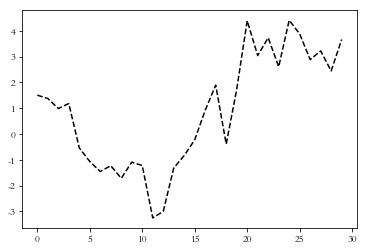

In [22]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

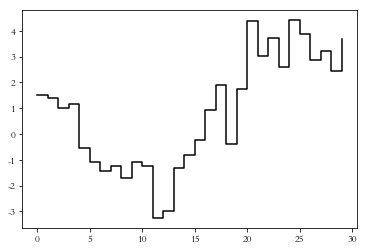

In [23]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

## 刻度、标签 和 图例

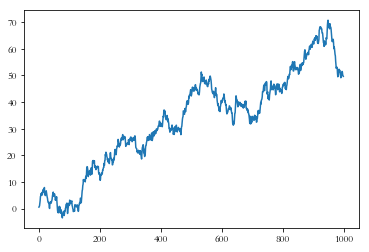

In [24]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

In [25]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5,3.2,'Stages')

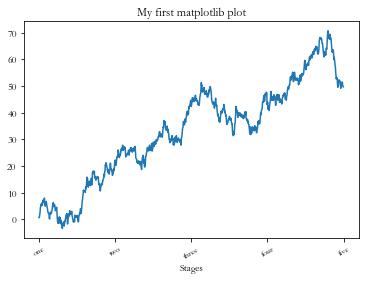

In [26]:
fig

In [27]:
from matplotlib.font_manager import _rebuild
_rebuild()

Text(0.5,0,u'\u9636\u6bb5')

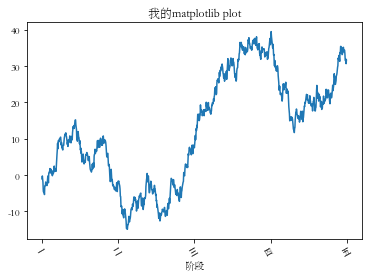

In [28]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels([u'一', u'二', u'三', u'四', u'五'],
                            rotation=30, fontsize='small')
ax.set_title(u'我的matplotlib plot')
ax.set_xlabel(u'阶段')

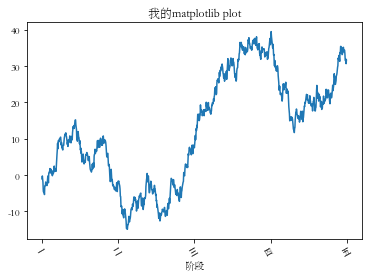

In [29]:
fig

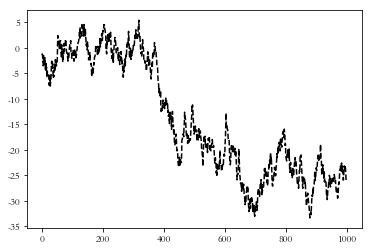

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k--', label='one')

In [31]:
ax.plot(randn(1000).cumsum(), 'k-.', label='two')

In [32]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [33]:
ax.legend(loc='best')    # 创建图例

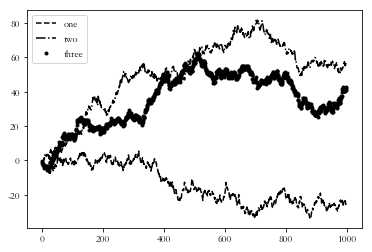

In [34]:
fig

In [35]:
ax.text(600, 30, 'Hello World!', family='monospace', fontsize=12)

Text(600,30,'Hello World!')

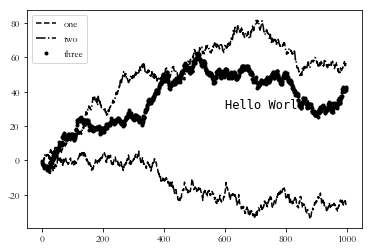

In [36]:
fig

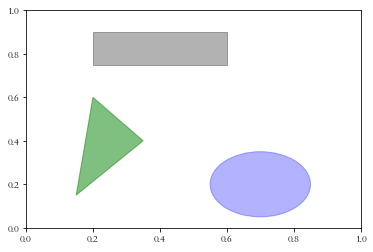

In [37]:
# 绘制图形
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 将图表保存到文件 

In [38]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

In [39]:
fig.savefig('figpath.pdf')    #根据文件扩展名推断文件类型

In [40]:
from io import BytesIO
buff = BytesIO()
fig.savefig(buff)
plot_data = buff.getvalue()

## matplotlib 配置

In [41]:
plt.rc('figure', figsize=(10, 10))

In [42]:
# rc 的第一个参数是希望 自定义的对象， 如 ‘figure’, 'axes'， ‘xtick’, 'ytick', 'grid', 'legend'等
font_options = {'family' : 'monospace', 
                'weight' : 'bold', 
                'weight' : 'bold', 
                'size' : '12'}

plt.rc('font', **font_options)

## pandas 中的绘图函数 

In [43]:
plt.close('all')

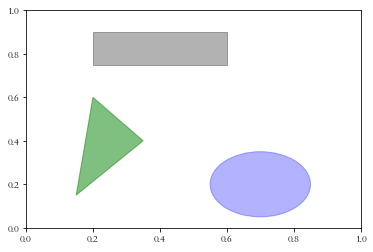

In [44]:
fig

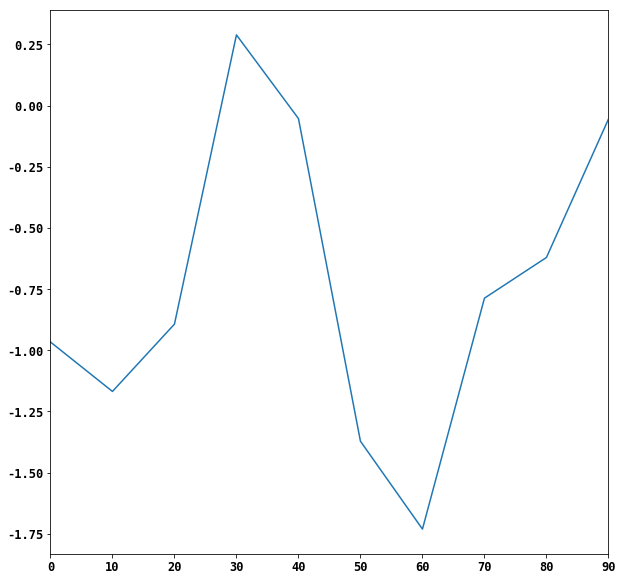

In [45]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()     # 该Series对象的索引会被传给matplotlib, 并用以绘制X轴

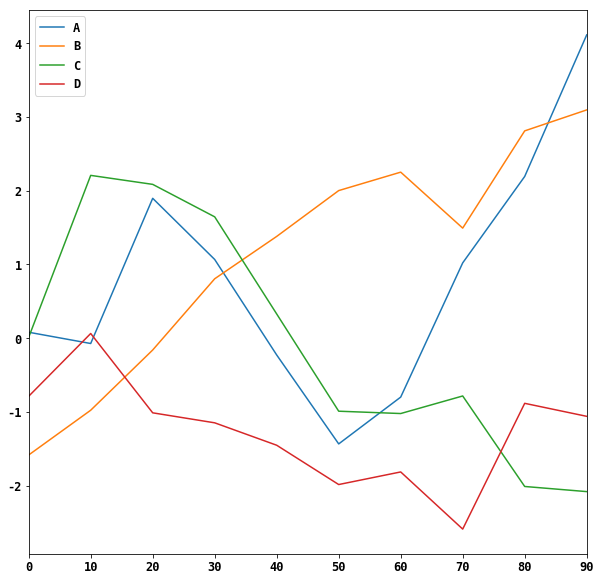

In [46]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()    # DataFrame 的plot() 方法会在一个subplot中为各列绘制一条线，并自动创建图例

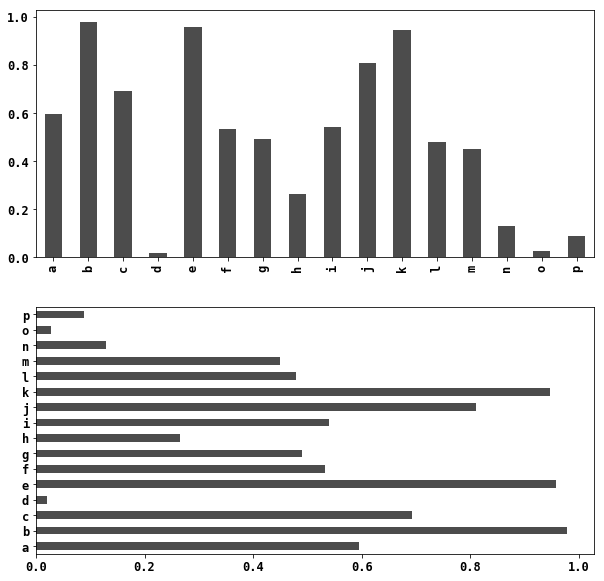

In [47]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [48]:
df = DataFrame(np.random.rand(6, 4), index=[u'一', u'二', u'三', u'四', u'五', u'六'],
              columns=pd.Index(['A', 'B', 'C', 'D'], name='Statistic'))
df

Statistic,A,B,C,D
一,0.983294,0.934403,0.690243,0.798346
二,0.679829,0.646136,0.092987,0.903935
三,0.889452,0.901051,0.024591,0.118209
四,0.922759,0.129640,0.641967,0.003183
五,0.044671,0.520994,0.817614,0.823947
六,0.194688,0.662939,0.567956,0.047360


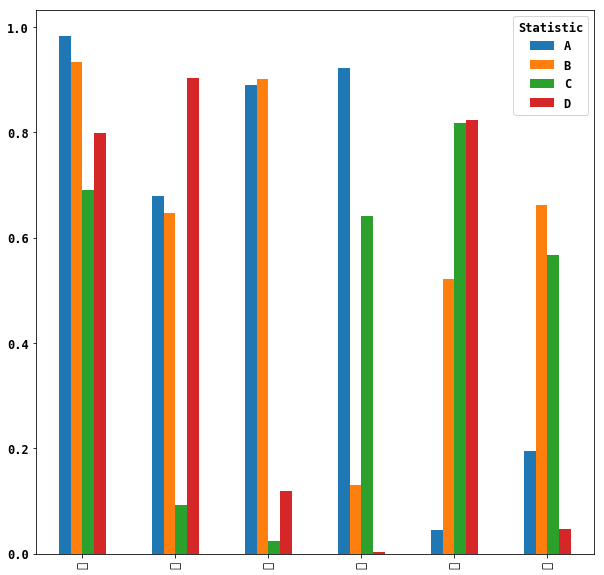

In [49]:
df.plot(kind='bar')

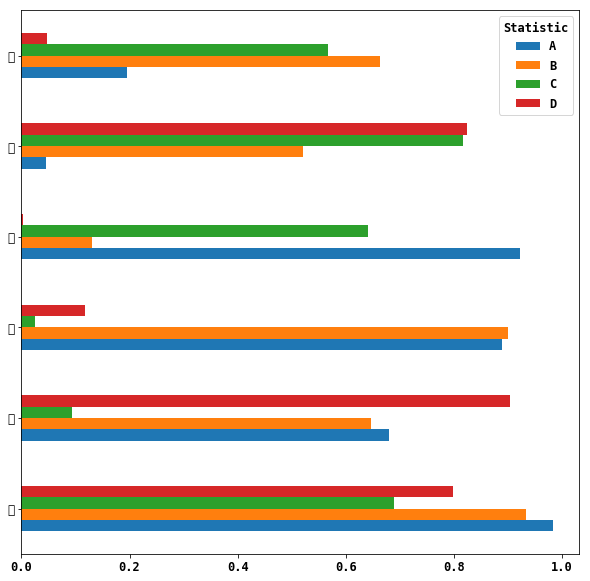

In [50]:
from matplotlib.font_manager import _rebuild
_rebuild()
df.plot(kind='barh')

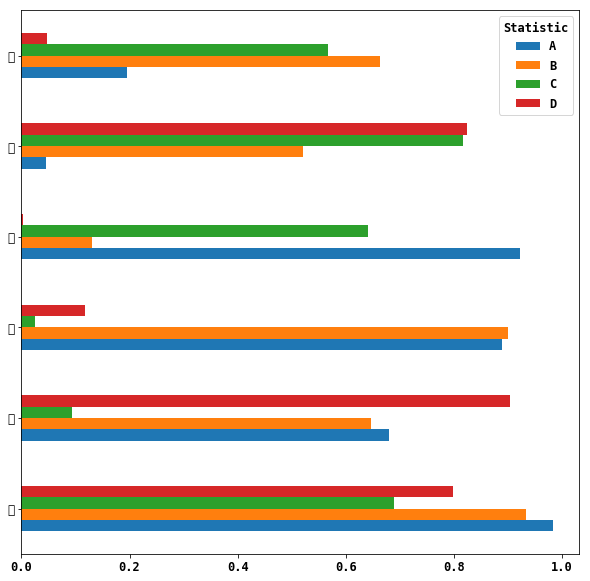

In [51]:
df.plot(kind='barh', stacked=False)

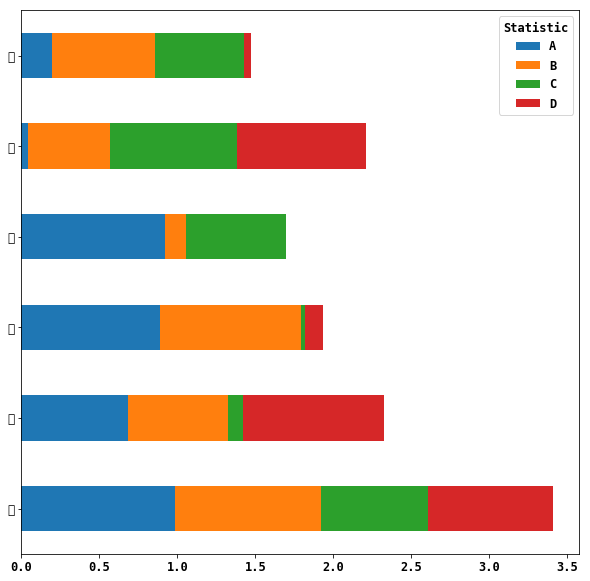

In [52]:
df.plot(kind='barh', stacked=True)

## 直方图和密度图

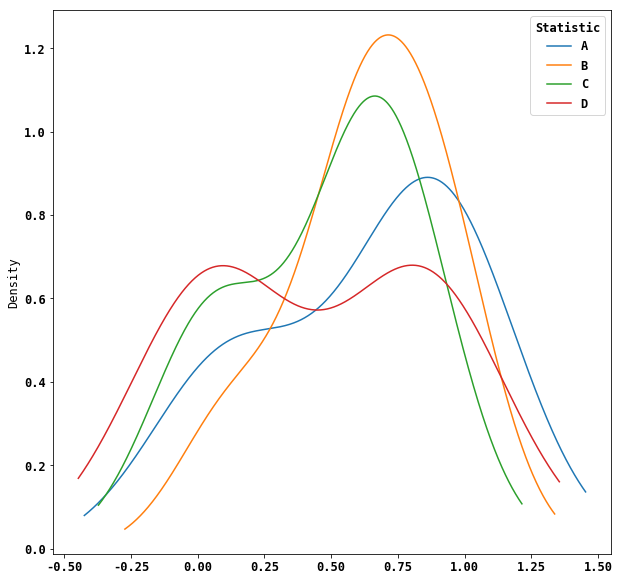

In [53]:
df.plot(kind='kde')

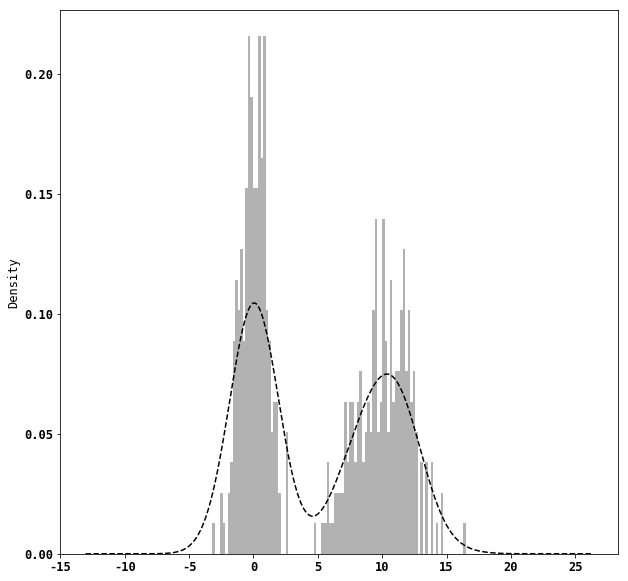

In [54]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', density=True)
values.plot(kind='kde', style='k--')

## 绘制地图：图形化显示海地地震危机数据

In [57]:
haiti_data = pd.read_csv('G:/dataAnalysis/data/Haiti.csv')
haiti_data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [58]:
haiti_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [60]:
haiti_data[['INCIDENT DATE', 'LOCATION', 'LONGITUDE', 'LATITUDE']][:10]

,INCIDENT DATE,LOCATION,LONGITUDE,LATITUDE
0,05/07/2010 17:26,"Jacmel, Haiti",-72.533333,18.233333
1,28/06/2010 23:06,fondwa,5.729886,50.226029
2,24/06/2010 16:21,centrie,114.174287,22.278381
3,20/06/2010 21:59,Genoca,8.933989,44.407062
4,18/05/2010 16:26,"Citi Soleil, Haiti",-72.334671,18.571084
5,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",-72.310079,18.593707
6,26/04/2010 14:19,Marc near Baraderes,-73.638800,18.482800
7,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,-73.195000,18.415000
8,15/03/2010 10:58,Pernier,-72.236841,18.517443
9,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,-72.410010,18.547790


In [63]:
haiti_data['CATEGORY'][:7]     #消息紧急程序类型

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
6    4. Menaces | Security Threats, 4e. Assainissem...
Name: CATEGORY, dtype: object

In [64]:
haiti_data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [66]:
# 去掉异常数据
data = haiti_data
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & (data.LONGITUDE > -75) & (data.LONGITUDE < 70) & data.CATEGORY.notnull()]

In [67]:
"""
获取所有分类的列表
"""
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

"""
获取英语名称
"""
def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [68]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [70]:
all_catgs = get_all_categories(data.CATEGORY)
all_catgs

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire',
 '2. Urgences logistiques | Vital Lines',
 "2a. Penurie d'aliments | Food Shortage",
 "2b. Penurie d'eau | Water shortage",
 '2c. Eau contaminee | Contaminated water',
 '2c. Probleme de securite | Security Concern',
 '2d. Refuge | Shelter needed',
 '2e. Penurie de carburant | Fuel shortage',
 '2f. Sans courant | Power Outage',
 '3. Public Health',
 '3a. Infectious human disease',
 '3b. Chronic care needs',
 '3c. Besoins en materiels et medicaments | Medical equipment and supply needs',
 "3d. OBGYN/Women's Health",
 '3e. Psychiatric need',
 '4. Menaces | Security Threats',
 '4a. Pillage | Looting',
 '4c. Group violence',
 '4e. Assainissement eau et hygiene | Water sanitation and hygiene promotion',
 '5. Infrastructure Damage',
 '5a. Structure effondres | Collapsed structure',
 '5b. Structures a risque | Unstable Str

In [72]:
enname_mapping = dict(get_english(x) for x in all_catgs)
enname_mapping

{'1': 'Emergency',
 '1a': 'Highly vulnerable',
 '1b': 'Medical Emergency',
 '1c': 'People trapped',
 '1d': 'Fire',
 '2': 'Vital Lines',
 '2a': 'Food Shortage',
 '2b': 'Water shortage',
 '2c': 'Security Concern',
 '2d': 'Shelter needed',
 '2e': 'Fuel shortage',
 '2f': 'Power Outage',
 '3': 'Public Health',
 '3a': 'Infectious human disease',
 '3b': 'Chronic care needs',
 '3c': 'Medical equipment and supply needs',
 '3d': "OBGYN/Women's Health",
 '3e': 'Psychiatric need',
 '4': 'Security Threats',
 '4a': 'Looting',
 '4c': 'Group violence',
 '4e': 'Water sanitation and hygiene promotion',
 '5': 'Infrastructure Damage',
 '5a': 'Collapsed structure',
 '5b': 'Unstable Structure',
 '5c': 'Road blocked',
 '5d': 'Compromised bridge',
 '5e': 'Communication lines down',
 '6': 'Natural Hazards',
 '6a': 'Deaths',
 '6b': 'Missing Persons',
 '6c': 'Earthquake and aftershocks',
 '7': 'Services Available',
 '7a': 'Food distribution point',
 '7b': 'Water distribution point',
 '7c': 'Non-food aid distribu

In [73]:
enname_mapping['6a']

'Deaths'

In [124]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_catgs)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [125]:
dummy_frame.iloc[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3578 entries, 0 to 3592
Data columns (total 6 columns):
1     3578 non-null float64
1a    3578 non-null float64
1b    3578 non-null float64
1c    3578 non-null float64
1d    3578 non-null float64
2     3578 non-null float64
dtypes: float64(6)
memory usage: 355.7 KB


In [129]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    print codes
    dummy_frame.loc[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

['1', '3']
['1']
['5e']
['4', '4e']
['4']
['2', '2f']
['2', '2d', '2a']
['1a', '2', '2d', '2a']
['4', '4e']
['2', '2d', '2a']
['2', '2b', '2a']
['3']
['2']
['1', '7', '8', '6']
['3', '3b']
['2', '2b']
['1', '7', '8', '6']
['1', '2', '2a']
['2', '2d', '8']
['2', '2d']
['2d', '2a']
['2', '2a']
['1b', '2', '2b', '2a', '7d']
['2', '2b']
['2', '2d']
['2', '2f']
['2']
['2']
['6']
['2']
['4']
['2', '2d', '3', '3d']
['2', '2a']
['2', '2f']
['2', '2b', '2d', '2a', '8']
['2', '2d', '8', '8f']
['2', '2b', '2a']
['2', '2b', '2a']
['2', '2d', '2a']
['1', '1d', '1b']
['2', '3']
['1', '1d', '1b']
['2', '2f']
['2', '2d', '8', '8a']
['2', '2b']
['2', '2d']
['2', '2d']
['2', '2d', '2a']
['2', '2b', '3a']
['2', '2b', '3a']
['2d']
['2b', '2d', '2a', '8', '8a']
['2d', '2a']
['2', '2b', '2a']
['2', '2b', '2d', '2a', '8', '8f']
['2b', '2d', '2a', '3']
['2', '2a']
['2', '2b', '2a', '3']
['2']
['2']
['2', '2a']
['2']
['2', '2a']
['3']
['7d', '3b']
['2', '2d']
['2', '8', '8c', '3']
['4', '4c']
['2', '2b', '2a']

['2b', '2a']
['2a']
['2a']
['2a']
['2b', '2a', '2d']
['2b', '2a']
['2a']
['2b', '2d', '2a']
['2b', '2a', '3c']
['2b', '2a']
['2b', '2a', '3c', '2d']
['2b', '2a', '2d']
['2b', '2a']
['2a']
['2b', '2a', '2d']
['2b', '2a', '2d']
['2d']
['2b', '2a', '2d']
['2d']
['2a']
['2a']
['2b', '2a', '3c']
['2b', '2a', '3c']
['1c']
['1b']
['3c']
['2b', '2a']
['2a']
['2b', '2a']
['2b', '2a']
['2b', '2a']
['2b', '2a', '2d']
['2b', '2a']
['2b', '2a']
['2b', '2a']
['2a']
['2b', '2a']
['2b', '2a', '2d']
['2b', '2a']
['4', '5c']
['2d']
['2b', '2a', '3c']
['2a']
['2b', '2a']
['2b', '2a', '2d']
['2a', '2d']
['2b', '2a']
['2b', '2a']
['2b', '2a']
['2b', '2a']
['2a']
['2b', '2a']
['2d']
['2b', '2a']
['5a', '1c', '5b', '2b', '5c', '2a', '8d', '2d', '7a', '4e', '7c', '7b', '8e']
['2d']
['2b', '2a', '2d']
['2a', '2d']
['7a']
['2b', '2a', '2d']
['7a']
['2b', '2a', '2d']
['2b', '2a']
['7a']
['2b', '2a', '3c', '2d']
['8']
['2a']
['2b', '2a']
['2b', '2a']
['2a', '2d']
['2a']
['2b', '2a']
['2b', '2a', '2d']
['2b', '2a'

['2a', '2d']
['2b', '2a']
['1b', '2b', '3c']
['2b', '2a']
['2b', '2a']
['2b', '2a']
['2b', '2a']
['2b', '2a']
['2a']
['2b', '2a']
['2a', '3c']
['7g', '8e']
['2a', '3c']
['2a']
['2b', '2a', '2d', '7c']
['2b', '2a']
['2a']
['2a']
['1b', '2b', '2a', '3c', '2d']
['2b', '2a', '3c']
['2b', '2a']
['1', '4', '2a']
['2b', '2a', '3c']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['8']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['2', '7']
['1c']
['1b']
['2b', '2a']
['2a']
['2b', '2a']
['2b']
['2a']
['2a']
['2b', '2a']
['2b', '2a']
['2a']
['2b', '2a']
['2a']
['1', '7']
['2b', '2a']
['2b', '2a']
['2b', '2a']
['3c']
['2b', '2a']
['1', '7']
['2a']
['2a']
['2a']
['2b', '2a', '3c']
['2b', '2a']
['2a']
['2b', '2a']
['2b', '2a', '3c']
['2b', '2a']
['2a']
[

['8']
['1', '7']
['2b', '2a']
['2', '2b', '2a']
['1']
['1']
['2a']
['1b', '2b', '2a']
['2b', '5c']
['4a', '4']
['2b']
['2b', '2a', '8']
['2b', '2a', '7c']
['2b', '2a']
['8']
['7', '4e']
['2b', '2a']
['3c']
['2b', '5c', '3c']
['1b']
['2a']
['2a', '3c']
['2b', '2a']
['4']
['2']
['5b']
['2b', '2a', '3c']
['1', '1c']
['4']
['4']
['2a', '3c', '7c']
['8']
['2e']
['3c', '7d']
['2b', '2a', '4e']
['7d']
['2b', '2a']
['2b', '2a']
['2']
['4', '2b', '2a', '3c', '7d', '2d', '7a', '7c', '7g', '4e']
['2b', '2a']
['2d']
['8']
['1b', '3c']
['8']
['2']
['2b']
['2b', '2a']
['2b', '2a']
['2b', '2a']
['2b', '2a']
['2b', '2a']
['2', '2a']
['2', '2a']
['2b', '2a']
['2']
['7d']
['2b', '2a']
['2b', '2a']
['2b', '2a']
['2b', '2a']
['1b']
['1']
['2a']
['8e', '6b']
['7', '8d']
['1', '7']
['7']
['7', '2d']
['5a', '1c']
['8e']
['7', '7d', '4e', '7c']
['2', '2b', '2a', '3c']
['2', '2b', '2a', '2e']
['2', '2b', '2a']
['2', '3c']
['2', '2b', '2a', '3c', '7', '7c']
['2', '2b', '2a', '3c']
['2', '2b', '2a', '3c']
['7d']

['2b', '2a']
['8e']
['1']
['2a']
['2']
['2', '7']
['4', '2c']
['1c']
['2b', '7a', '4e', '2a', '7b']
['1', '5a', '2c', '4', '2b', '2f', '7', '2d', '6c', '8e', '4a', '2a', '4e']
['1b']
['1', '2b', '1b', '4e']
['2b', '2a']
['1', '1c', '8d', '7h']
['1', '1c', '8d']
['8e']
['8e', '6b']
['2b', '2a']
['1', '1c']
['4']
['1', '1c']
['2b', '2a']
['1b', '7d']
['2', '7']
['7a']
['7d']
['8e']
['7d']
['7d']
['7d']
['1c']
['8e', '6c']
['8e', '2a']
['2b', '8', '2a', '3c']
['7']
['8e']
['7c', '8']
['8e']
['7d']
['7d']
['2a']
['1b']
['2a']
['2', '3c', '2e']
['3c']
['2a']
['8e']
['1c']
['7']
['1', '1c', '1b', '8e']
['7', '8', '8e']
['7a']
['2b', '7a', '2a', '3c']
['1b', '2a']
['8e', '6c']
['1c']
['2b', '2a']
['4']
['1', '1c']
['2b', '7a']
['2']
['2b', '2a']
['7d']
['5a']
['2b']
['7d']
['2b', '8e', '2a']
['2a']
['4a']
['2b']
['2b', '7d', '1b', '2a']
['1c']
['8e']
['2b', '7a']
['2b', '7d', '2a']
['7', '7d', '7c', '8e']
['4e']
['8e']
['8e']
['8e']
['2d', '2a']
['2b']
['7a']
['2', '7d']
['1b', '2b', '2a']
['

['8e']
['8e']
['8e']
['8e']
['8e']
['8e']
['8e']
['8e']
['8e']
['5a', '8e']
['8e']
['8']
['8e']
['1', '5a']
['1', '5a']
['8e']
['8e']
['1c']
['8']
['8', '6c']
['6c']
['5a', '5b']
['5a', '1c']
['5a']
['5b', '8']
['7d']
['7d']
['7d']
['6c']
['5a', '1c']
['7d']
['5a', '4']
['5a', '1c']
['6c']
['1', '5a']
['1']
['5c']
['5a', '1c']
['5a']
['5b']
['5a']


ValueError: columns overlap but no suffix specified: Index([u'category_1', u'category_1a', u'category_1b', u'category_1c',
       u'category_1d', u'category_2', u'category_2a', u'category_2b',
       u'category_2c', u'category_2d', u'category_2e', u'category_2f',
       u'category_3', u'category_3a', u'category_3b', u'category_3c',
       u'category_3d', u'category_3e', u'category_4', u'category_4a',
       u'category_4c', u'category_4e', u'category_5', u'category_5a',
       u'category_5b', u'category_5c', u'category_5d', u'category_5e',
       u'category_6', u'category_6a', u'category_6b', u'category_6c',
       u'category_7', u'category_7a', u'category_7b', u'category_7c',
       u'category_7d', u'category_7g', u'category_7h', u'category_8',
       u'category_8a', u'category_8c', u'category_8d', u'category_8e',
       u'category_8f'],
      dtype='object')

In [131]:
data.iloc[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3578 entries, 0 to 3592
Data columns (total 5 columns):
category_1. Urgences | Emergency                           3578 non-null float64
category_1a. Highly vulnerable                             3578 non-null float64
category_1b. Urgence medicale | Medical Emergency          3578 non-null float64
category_1c. Personnes prises au piege | People trapped    3578 non-null float64
category_1d. Incendie | Fire                               3578 non-null float64
dtypes: float64(5)
memory usage: 327.7 KB


In [132]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, enname_mapping[code]))

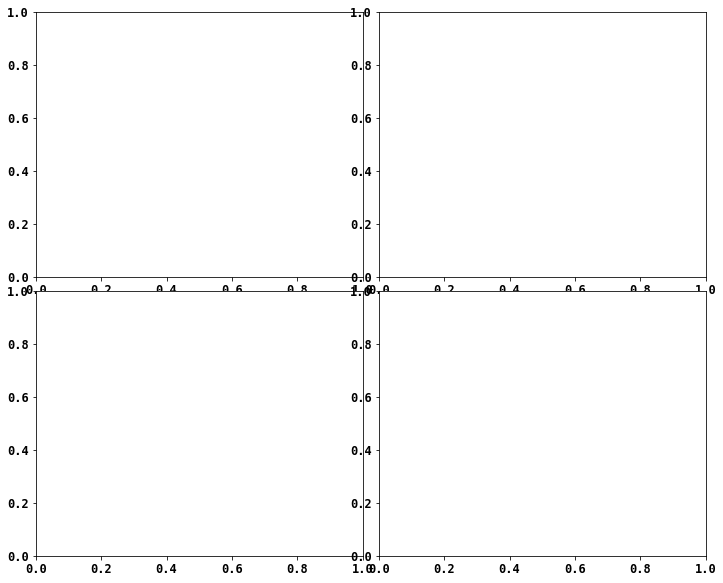

In [134]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, enname_mapping[code]))

In [ ]:
make_plot()